<a href="https://colab.research.google.com/github/davidvlaminck/AWVGeneric/blob/10-agents/UseCases/Agents/get_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agents ophalen
Download een documenten met alle **Agents**.

Achterliggend wordt gebruik gemaakt van de [EM-Infra API](https://apps.mow.vlaanderen.be/eminfra/core/swagger-ui/).

Lanceer via de play-knop 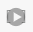
aan de linkerzijde achtereenvolgens (een per een) ieder blokje code.

In [71]:
import os, shutil
import sys
from datetime import datetime

import pandas as pd
from pathlib import Path
from google.colab import files

if os.path.exists('AWVGeneric'):
  shutil.rmtree('AWVGeneric')
!git clone https://github.com/davidvlaminck/AWVGeneric.git -b '10-agents'
sys.path.insert(0, '/content/AWVGeneric')  # adds the Python files from the GitHub repo to the sys-path.
sys.path.insert(0, '/content/AWVGeneric/UseCases/Agents')  # adds the Python files from the GitHub repo to the sys-path.

from API.EMInfraClient import EMInfraClient
from API.EMInfraDomain import QueryDTO, PagingModeEnum, SelectionDTO, ExpressionDTO, TermDTO, OperatorEnum
from API.Enums import AuthType, Environment

import ipywidgets as widgets

Cloning into 'AWVGeneric'...
remote: Enumerating objects: 733, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 733 (delta 154), reused 160 (delta 129), pack-reused 533 (from 1)
Receiving objects: 100% (733/733), 923.88 KiB | 13.20 MiB/s, done.
Resolving deltas: 100% (439/439), done.


[Documentatie om een cookie op te halen](https://sites.google.com/mow.vlaanderen.be/em-infra/afspraken-conventies/awv-cookie-ophalen)

In [72]:
# environment
widget_environment = widgets.Dropdown(
    options=[item for item in Environment],
    value=Environment.PRD,
    description='Omgeving:',
    disabled=False,
)
print("\n")
print("Selecteer de ongeving:")
display(widget_environment)



Selecteer de ongeving:


Dropdown(description='Omgeving:', options=(<Environment.PRD: ('prd',)>, <Environment.DEV: ('dev',)>, <Environm…

In [73]:
#cookie
widget_cookie = widgets.Text(value='2f20f4bcc9bc4ff887b6b472ca0b8781')
print('Vul de cookie in (bijvoorbeeld: "2f20f4bcc9bc4ff887b6b472ca0b8781")')
display(widget_cookie)
cookie = widget_cookie.value

Vul de cookie in (bijvoorbeeld: "2f20f4bcc9bc4ff887b6b472ca0b8781")


Text(value='2f20f4bcc9bc4ff887b6b472ca0b8781')

In [74]:
environment = widget_environment.value
eminfra_client = EMInfraClient(cookie=cookie, auth_type=AuthType.COOKIE, env=environment)

In [75]:
query_dto = QueryDTO(
    size=100,
    from_=0,
    pagingMode=PagingModeEnum.OFFSET,
    expansions={"fields": ["contactInfo"]},
    selection=SelectionDTO(
        expressions=[
            ExpressionDTO(terms=[TermDTO(property='actief', operator=OperatorEnum.EQ, value=True)])
        ]
    )
)

generator_agents = eminfra_client.search_agent(query_dto=query_dto)
agents = list(generator_agents) # convert generator to a list
print(f"Found a total of:\t{len(agents)} agents.")

# Convert the list to a dictionary
agents_dict = {
    "uuid": [agent.uuid for agent in agents]
    , "naam": [agent.naam for agent in agents]
    , "ovoCode": [agent.ovoCode for agent in agents]
    , "voId": [agent.voId for agent in agents]
}

# Convert the dictionary to a pandas df
df_agents = pd.DataFrame(data= agents_dict)
df_agents_sorted = df_agents.sort_values(by="naam", ascending=True)
# Convert pandas df to an Excel
filename = f'agents_{environment.name}_{datetime.now().date()}.xlsx'
df_agents_sorted.to_excel(filename, sheet_name='Agents', index=False, freeze_panes=[1,0])

Found a total of:	1822 agents.


In [76]:
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>